# DSCI 100 Project

## 1. Description

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
player_url <- "https://raw.githubusercontent.com/JuiceTanWeb/Individual-Project-Planning-Phase/refs/heads/main/data/players.csv"
sessions_url <- "https://raw.githubusercontent.com/JuiceTanWeb/Individual-Project-Planning-Phase/refs/heads/main/data/sessions.csv"
players <- read_csv(player_url)
sessions <- read_csv(sessions_url)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The players and sessions data tables were collected from Frank Wood's research study. In this study, players play "sessions" of minecraft and their data is collected. 

In [3]:
print(n = 10, tibble(players))
print(n = 10, tibble(sessions))

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      17
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

There are 196 players and 1535 sessions in the dataset.

There are 7 variables in players
- experience
    - Experience level
- subscribe
    - Subscription status(subscribed or not)
- hashedEmail
    - Hashed email of the user
- played_hours
    - Hours played by user.
- name
    - Name of player
- gender
    - Gender of player
- Age
    - Age of player


The sessions table has 5 variables:
- hashedEmail
  - Hashed email of the user
- start_time
  - Time that the user started playing (dd/mm/yyyy)
- end_time
  - Time user stopped playing (dd/mm/yyyy)
- original_start_time
  - Time that the user started playing in UNIX time.
- original_end_time.
  - Time that the user stopped playing in UNIX time.

Experience, subscribe and gender are categorical variables while played_hours, Age, start_time, end_time original_start_time and original_end_time are quantitative variables. One issue I can see with this table is that the columns are not consistently named. To fix this, Age should be age, hashedEmail should be hashed_email. start_time and original_start_time contain the same information and one should be removed. original_end_time and end_time are also contain the same information so one should be removed.



Summary Statistics

In [4]:
players_quantitative <- select(players, played_hours, Age)

summary(players_quantitative)

  played_hours          Age       
 Min.   :  0.000   Min.   : 8.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :20.52  
 3rd Qu.:  0.600   3rd Qu.:22.00  
 Max.   :223.100   Max.   :50.00  
                   NA's   :2      

In [5]:
library(dplyr)

gender_counts <- players %>%
  select(gender) %>%
  count(gender)
gender_counts
subscribe_counts <- players %>%
  select(subscribe) %>%
  count(subscribe)
subscribe_counts

experience_counts <- players %>%
  select(experience) %>%
  count(experience)
experience_counts

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


73.5% players are subscribed. The mean number of played hours is 5.85 hours, the median is 0.1 hours, the maximum is 223 hours, the minimum is 0 hours, and the standard deviation is 28.35 hours. The mean age is 20.5 with a standard deviation of 6. The majority of players are male and expreience is mostly even with the exception of fewer pro players.

In [6]:
sessions_quantitative <- select(sessions, original_start_time, original_end_time)

summary(sessions_quantitative)

 original_start_time original_end_time  
 Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :1.719e+12   Median :1.719e+12  
 Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :1.727e+12   Max.   :1.727e+12  
                     NA's   :2          

The data above also conveys the same information as start_time and end_time.

## 2. Questions

Broad Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Specific Question: Can experience level, age and played hours predict subscription status?

The data in the players dataset is already tidy.

## 3. Visualizations/Analysis

In [7]:
colnames(players) <- c("experience", "subscribe", "hashed_email", "played_hours", "name", "gender", "age")

In [8]:
players_quantitative <- select(players, played_hours, age)
results <- map_df(players_quantitative, mean, na.rm = TRUE) |>
add_row(map_df(players_quantitative, median, na.rm = TRUE)) |>
add_row(map_df(players_quantitative, sd, na.rm = TRUE)) |>
add_row(map_df(players_quantitative, max, na.rm = TRUE)) |>
add_row(map_df(players_quantitative, min, na.rm = TRUE)) |>
add_column(.before = TRUE, observation_type = c("mean", "median", "standard_deviation", "max", "min"))
results

observation_type,played_hours,age
<chr>,<dbl>,<dbl>
mean,5.845918,20.520619
median,0.100000,19.000000
standard_deviation,28.357343,6.174667
max,223.100000,50.000000
min,0.000000,8.000000


In [9]:
library(dplyr)

gender_counts <- players %>%
  select(gender) %>%
  count(gender)
gender_counts
subscribe_counts <- players %>%
  select(subscribe) %>%
  count(subscribe)
subscribe_counts

experience_counts <- players %>%
  select(experience) %>%
  count(experience)
experience_counts



gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


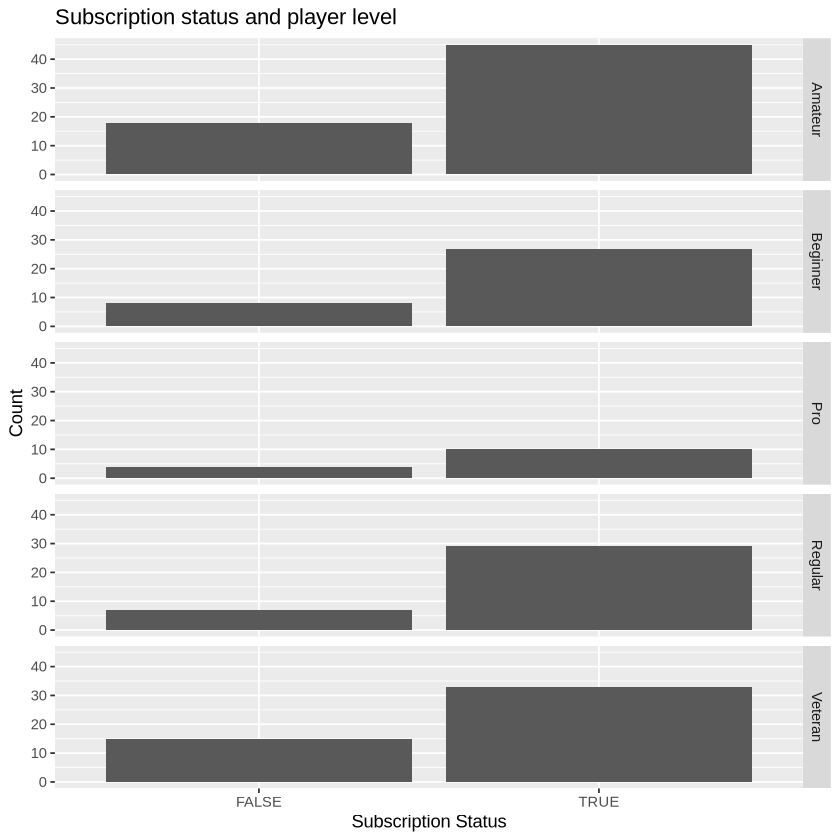

In [10]:
ggplot(players, aes(subscribe)) + 
geom_bar() + 
facet_grid(rows = vars(experience)) + 
labs(x = "Subscription Status", y = "Count") +
ggtitle("Subscription status and player level")

This graph shows that amateur and veteran players were the most likely to buy the subscription.

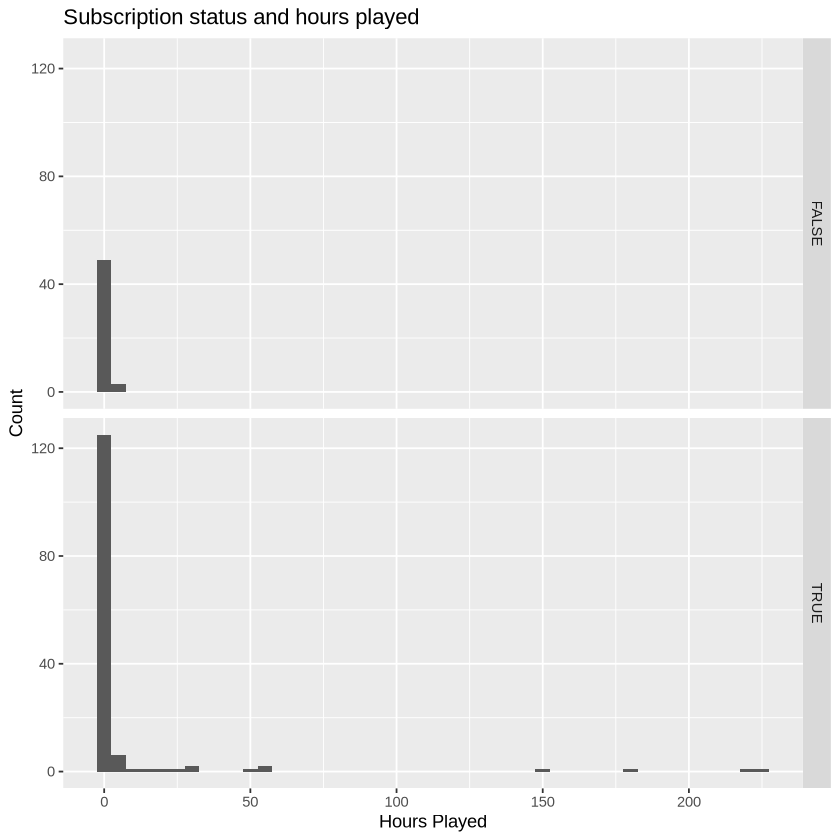

In [11]:
ggplot(players, aes(played_hours)) + 
geom_histogram(binwidth = 5) + 
facet_grid(rows = vars(subscribe)) + 
labs(x = "Hours Played", y = "Count") +
ggtitle("Subscription status and hours played")

This graph shows that the majority of players did not play much, but the ones that did tended to buy the subscription.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


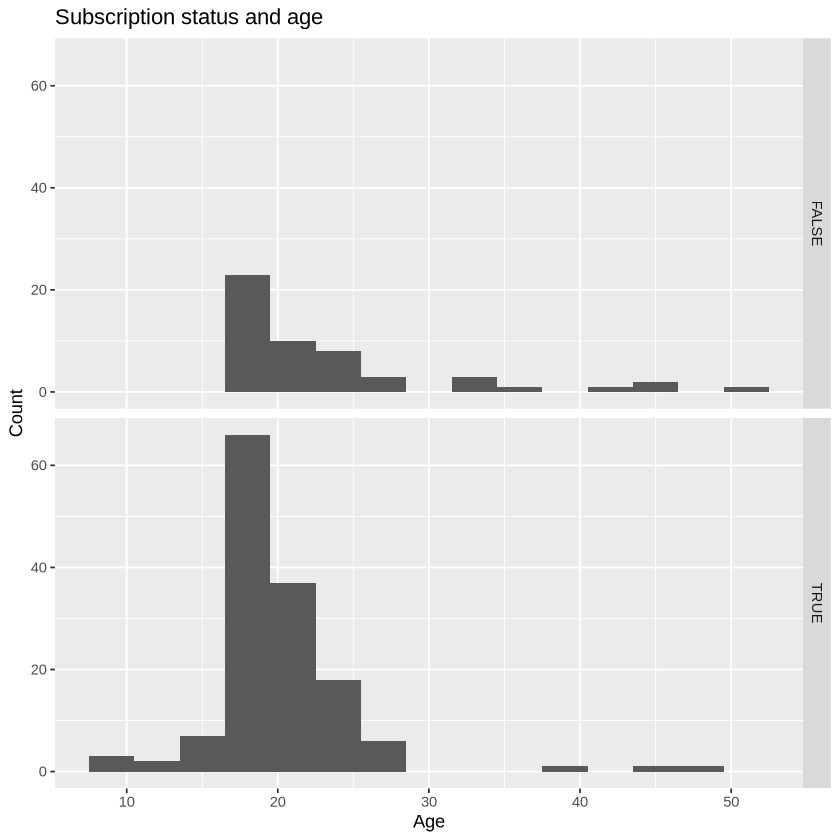

In [12]:
ggplot(players, aes(age)) + 
geom_histogram(binwidth = 3) + 
facet_grid(rows = vars(subscribe)) + 
labs(x = "Age", y = "Count") +
ggtitle("Subscription status and age")

This graph shows that there is not a huge difference between the ages of the average subscriber vs non-subscriber. However, I thought it was interesting that the small number of players under the age of 16 were all subscribers.

## 4. Methods/Plan

I will use KNN to predict subscription status given hours played and player level. This is appropriate given that I do not know the relation between age, hours played, player level and subscription status. This model may leave out gender discrepancies, but we don't have enough gender-specific data to make a good prediction. I plan on performing 5-fold cross-validation to train my model. I will first split the data into a training set and a testing set before I start training the model. I will then standardize the data. After, I will compare the accuracy of the model with the test set to find the right value for k. 